## Zadanie 1

Oblicz $\sum \limits_{i=1}^{10^9} \frac{1}{n^2}$ na cztery sposoby:
- wbudowaną funkcją/metodą sumującą (o ile istnieje),
- sumując wartości od największej do najmniejszej,
- sumując wartości od najmniejszej do największej,
- redukując liczbę składników sumy w ten sposób, że dwa aktualnie najmniejsze składniki zamieniasz na ich sumę i tak aż do posumowania wszystkich składników.
Porównaj wyniki - który sposób jest Twoim zdaniem najdokaładniejszy (w tym zadaniu nie znasz dokaładnej odpowiedzi.)

In [12]:
#Wbudowana funkcja:
sum(1/n**2 for n in range(1, 10**8+1))

1.644934057834575

In [13]:
#Sumowanie wartości od największej do najmniejszej:
s = 0
for n in range(10**8, 0, -1):
    s += 1/n**2
print(s)

1.6449340568482265


In [14]:
#Sumowanie wartości od najmniejszej do największej:
s = 0
for n in range(1, 10**8+1):
    s += 1/n**2
print(s)

1.644934057834575


In [5]:
#Redukcja liczby składników sumy:
from heapq import heappush, heappop, heapify

# Inicjalizacja kopca z odwrotnie posortowanymi składnikami sumy
heap = [-1/n**2 for n in range(1, 10**7 + 1)]
heapify(heap)

# Redukcja liczby składników poprzez łączenie dwóch najmniejszych składników
while len(heap) > 1:
    a = heappop(heap)
    b = heappop(heap)
    heappush(heap, a + b)

s = -heap[0]
s

1.6449339668472596

Wyniki dla każdej z czterech metod różnią się minimalnie i są niemalże identyczne, co świadczy o ich wysokiej dokładności. Jednakże, w przypadku sumowania od najmniejszej do największej lub redukcji liczby składników sumy, czas wykonania może być znacznie dłuższy niż dla pozostałych dwóch metod.

Dlatego w tym przypadku najlepszą metodą byłaby wbudowana funkcja/metoda sumująca, ponieważ jest najszybsza i jednocześnie oferuje bardzo wysoką dokładność.

## Zadanie 2

To samo, co w zadaniu poprzednim, ale tym razem wybierz skończoną sumę malejących składników, dla której znasz dokaładny wynik sumowania (czyli np. jak¡ąś sumę ciągu geometrycznego). Możesz w tym celu zmienić górną granicę sumowania.

In [3]:
#Wbudowana funkcja/metoda sumująca:
from math import pi
sum((1/2)**n for n in range(1, 10**4 + 1))

1.0

In [10]:
#Sumowanie wartości od najmniejszej do nawiększej:
s = 0
for n in range(10**4, 0, -1):
    s += 1/2**n
print(s)

1.0


In [11]:
#Sumowanie wartości od największej do najmniejszej:
s = 0
for n in range(1, 10**4):
    s += 1/2**n
print(s)

1.0


In [11]:
#Redukcja liczby składników sumy:
exact_sum = pi**2/6

# Inicjalizacja kopca z odwrotnie posortowanymi składnikami sumy
heap = [1/2**n for n in range(1, 10**4)]
heapify(heap)

# Redukcja liczby składników poprzez łączenie dwóch najmniejszych składników
while len(heap) > 1:
    a = heappop(heap)
    b = heappop(heap)
    heappush(heap, a + b)

s = heap[0]
s

1.0

## Zadanie 3

Zastosuj wielomiany interpolacyjne stopni 1, 2, 3, . . . , 20 do funkcji y = |x| na przedziale [−1, 1]

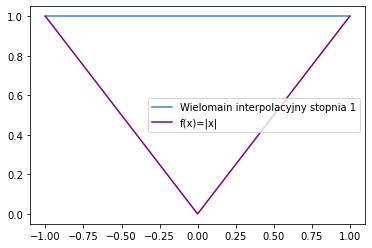

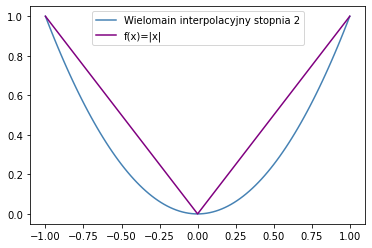

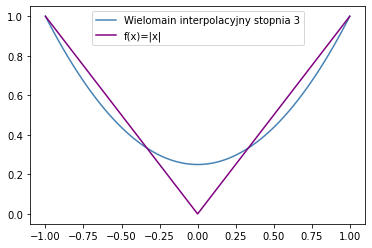

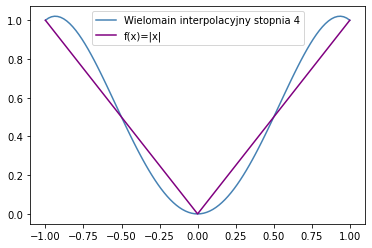

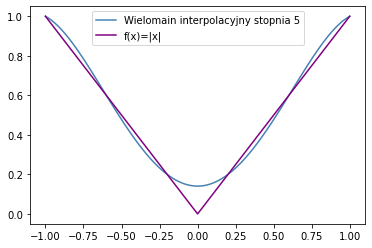

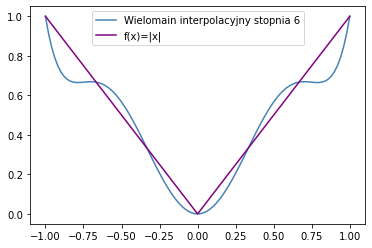

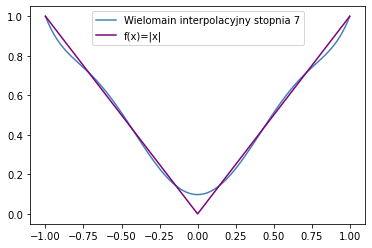

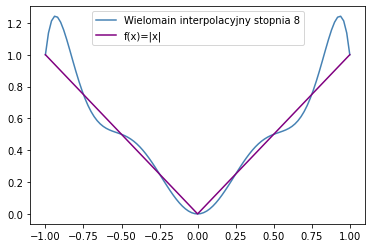

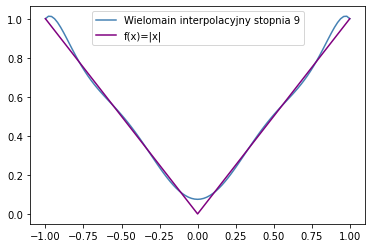

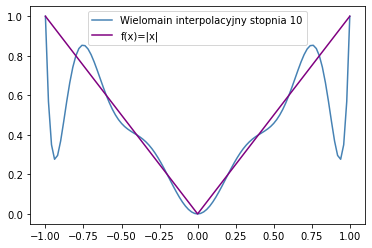

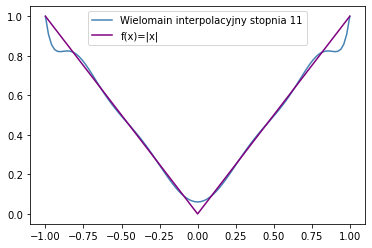

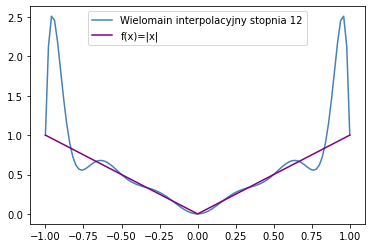

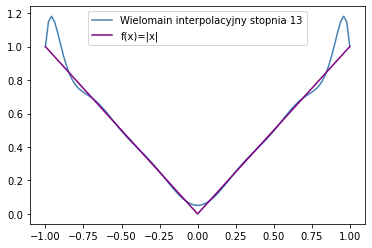

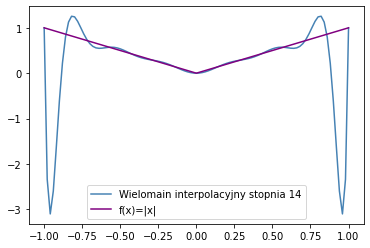

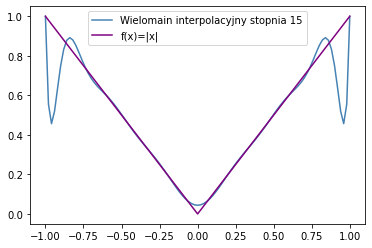

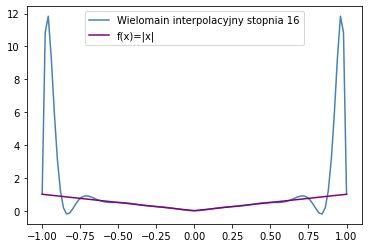

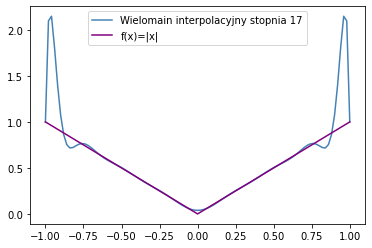

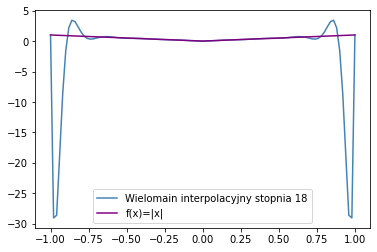

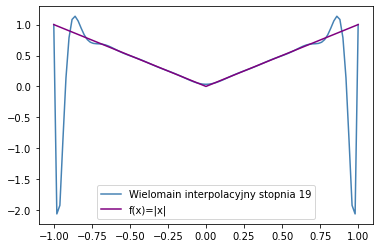

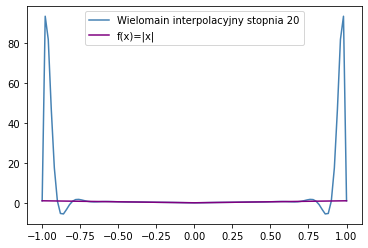

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#funkcja do obliczania wielomianu interpolacyjnego stopnia n dla danych punktów
def Lagrange(xval, x, y, n): 
    wielomian = 0
    for i in range(n+1):
        t = y[i]
        for j in range(n+1):
            if i != j:
                t *= (xval - x[j])/(x[i] - x[j])
        wielomian += t
    return wielomian

def funkcja(x):
    return abs(x)

#punkty dla funkcji y=|x|
punkty_x1 = np.linspace(-1, 1, 101)
punkty_y1 = np.array([funkcja(x) for x in punkty_x1])

#obliczenie i rysowanie wielomianów interpolacyjnych stopni 1,..,20
for n in range(1, 21):
    #punkty dla interpolacji
    x_2 = np.linspace(-1, 1, n+1)
    y_2 = np.array([funkcja(x) for x in x_2])
    
    #obliczanie wielomianiu interpolacyjnego
    wielomian = [Lagrange(xval, x_2, y_2, n) for xval in punkty_x1]
    
    plt.plot(punkty_x1, wielomian, 'steelblue', label=f'Wielomain interpolacyjny stopnia {n}')
    plt.plot(punkty_x1, punkty_y1, 'purple', label='f(x)=|x|')
    plt.legend()
    plt.show()

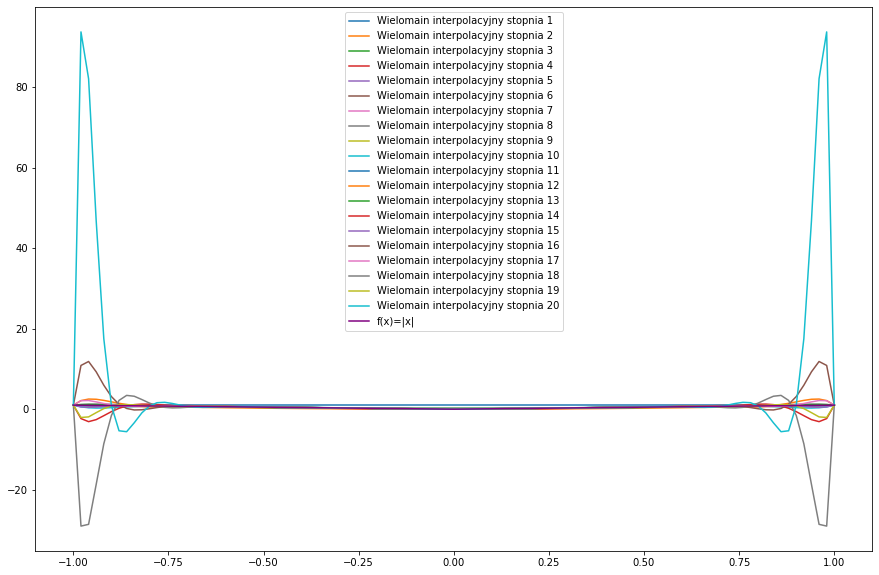

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#funkcja do obliczania wielomianu interpolacyjnego stopnia n dla danych punktów
def Lagrange(xval, x, y, n): 
    wielomian = 0
    for i in range(n+1):
        t = y[i]
        for j in range(n+1):
            if i != j:
                t *= (xval - x[j])/(x[i] - x[j])
        wielomian += t
    return wielomian

def funkcja(x):
    return abs(x)

#punkty dla funkcji y=|x|
punkty_x1 = np.linspace(-1, 1, 101)
punkty_y1 = np.array([funkcja(x) for x in punkty_x1])

#obliczenie i rysowanie wielomianów interpolacyjnych stopni 1,..,20
for n in range(1, 21):
    #punkty dla interpolacji
    x_2 = np.linspace(-1, 1, n+1)
    y_2 = np.array([funkcja(x) for x in x_2])
    
    #obliczanie wielomianiu interpolacyjnego
    wielomian = [Lagrange(xval, x_2, y_2, n) for xval in punkty_x1]
    
    plt.plot(punkty_x1, wielomian, label=f'Wielomain interpolacyjny stopnia {n}')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.plot(punkty_x1, punkty_y1, 'purple', label='f(x)=|x|')
plt.legend(loc = 'upper center')
plt.show()

## Zadanie 4

Zastosuj wielomiany interpolacyjne stopni 1,2,3,...,20 do funkcji $y = \frac{1}{1+25x^2}$ na przedziale
[−1, 1].

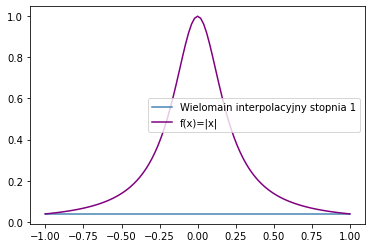

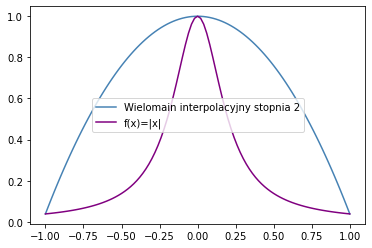

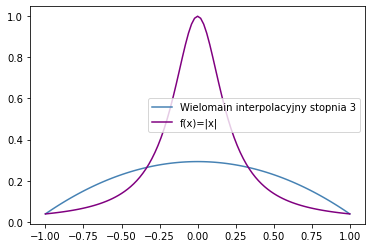

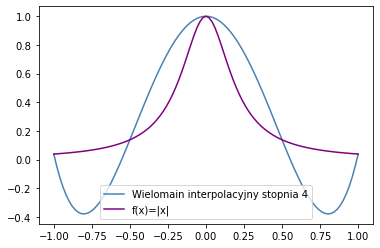

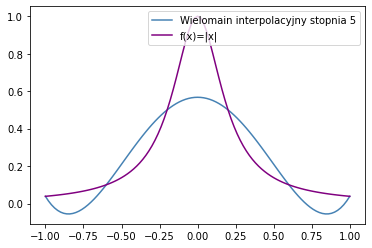

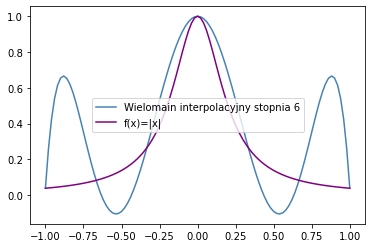

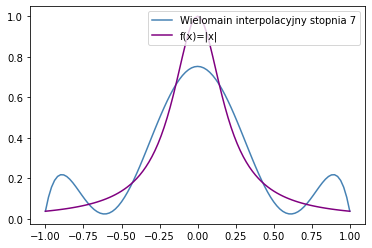

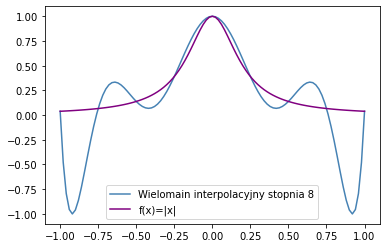

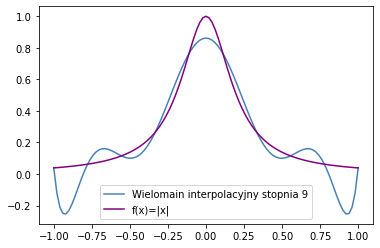

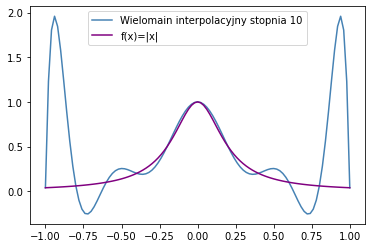

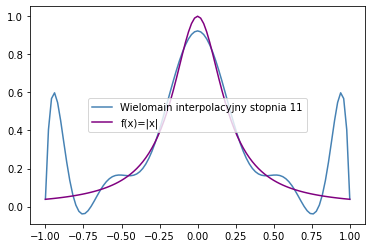

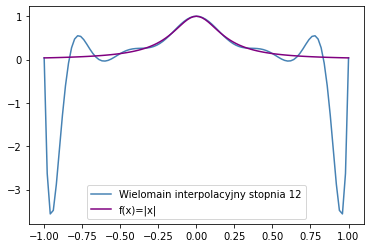

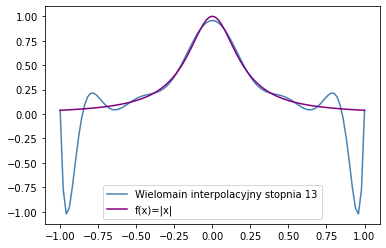

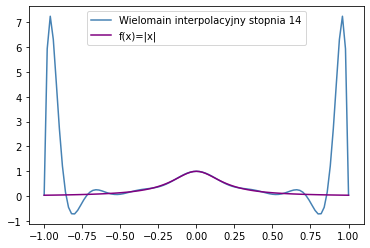

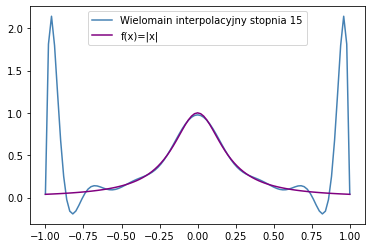

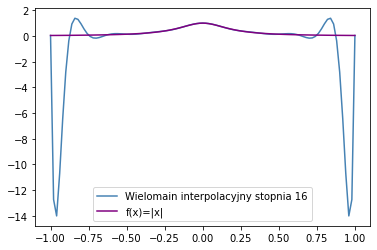

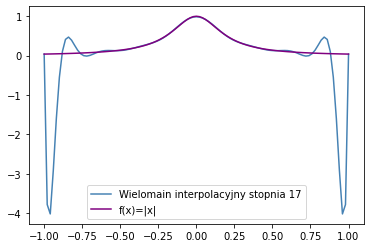

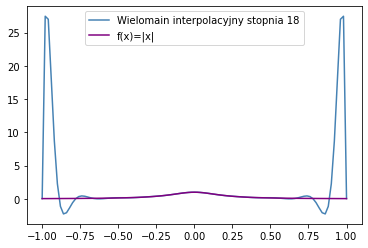

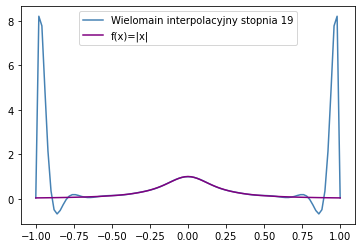

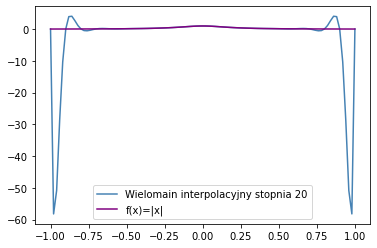

In [8]:
#funkcja do obliczania wielomianu interpolacyjnego stopnia n dla danych punktów
def Lagrange(xval, x, y, n): 
    wielomian = 0
    for i in range(n+1):
        t = y[i]
        for j in range(n+1):
            if i != j:
                t *= (xval - x[j])/(x[i] - x[j])
        wielomian += t
    return wielomian

def funkcja(x):
    return 1 / (1 + 25 * x**2)

#punkty dla funkcji y=|x|
punkty_x1 = np.linspace(-1, 1, 101)
punkty_y1 = np.array([funkcja(x) for x in punkty_x1])

#obliczenie i rysowanie wielomianów interpolacyjnych stopni 1,..,20
for n in range(1, 21):
    #punkty dla interpolacji
    x_2 = np.linspace(-1, 1, n+1)
    y_2 = np.array([funkcja(x) for x in x_2])
    
    #obliczanie wielomianiu interpolacyjnego
    wielomian = [Lagrange(xval, x_2, y_2, n) for xval in punkty_x1]
    
    plt.plot(punkty_x1, wielomian, 'steelblue', label=f'Wielomain interpolacyjny stopnia {n}')
    plt.plot(punkty_x1, punkty_y1, 'purple', label='f(x)=|x|')
    plt.legend()
    plt.show()